# Example workflow

In this workbook, we demonstrate a complete $\texttt{MPT-Calculator}$ workflow. We will cover constructing a new object and assigning material properties, running $\texttt{MPT-Calculator}$ over wide frequency sweep, and checking convergence for the eigenvalues we obtain.

## Generating a geometry:

$\texttt{.geo}$ files follow a standard format and objects are defined via object primatives. See [this tutorial](geometry_example.ipynb) for more detail.

For this example, we wish to simulate a simple steel wrench inside a large non-conducting sphere. 
We begin by first defining the desired geometry.
```
algebraic3d

solid sphout = sphere (0, 0, 0; 1000);

solid shaft = orthobrick(-10, -1, -0.5; 10, 1, 0.5) -maxh=0.5;

solid claw = cylinder(11, 0, -0.5; 11, 0, 0.5; 2)
	and plane(0, 0, 0.5; 0, 0, 1)
	and plane(0, -0, -0.5; 0, 0, -1);

solid cutout_claw = orthobrick (10.3, -0.75, -0.51; 13, 0.75, 0.51);

solid socket = cylinder(-11, 0, -1; -11, 0, 1; 2)
	and plane(0, 0, 0.5; 0, 0, 1)
	and plane(0, -0, -0.5; 0, 0, -1);

solid cutout_socket = cylinder(-11.2, 0, -1.1; -11.2, 0, 1.1; 1.3)
	and plane(0, 0, 0.51; 0, 0, 1)
	and plane(0, -0, -0.51; 0, 0, -1);

solid wrench = shaft or claw and not cutout_claw or socket and not cutout_socket;


solid rest = sphout and not wrench;

tlo rest -transparent -col=[0,0,1];#air
tlo wrench -col=[1,0,0];#wrench -mur=1  -sig=3.5E7
```
<b>By convention, we have chosen a millimeter scale when defining the object, thus we also want to choose $\texttt{alpha=1E-3}$</b>

This geometry has been saved in $\texttt{GeoFiles/wrench.geo}$. Note that we have also defined a relative permeability $\mu_r = 1$ and conductivity $\sigma=3.5 \times 10^7$ S/m inside the wrench to match our desired material output.

We can check the geometry of the object by either loading it into $\texttt{Netgen}$ directly, or via the supported web gui.

## Running a sweep and checking for convergence
For this example, we want to run $\texttt{MPT-Calculator}$ over the frequency range $10^3$ rad/s to $10^6$ rad/s in 80 logarithmically spaced steps.

We need to run the simulation with these settings, and check that the solution we obtain is converged for the entire frequency range of interest. To do this, we will iterate $\texttt{MPT-Calculator}$ for $p=2,3,4$.

In [1]:
start = 3
stop = 6
points = 80
geometry = 'Wrench.geo'

To run the code, we need to navigate to the root directory

In [2]:
import os
root_dir = os.path.dirname(os.getcwd())
os.chdir(root_dir)

We now import the main function, along with numpy and matplotlib for plotting the results

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from runner import main

importing NGSolve-6.2.2203


And run the simulation

Wrench.geo
generating mesh
 mesh contains 34971 elements
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
 solved theta0 problems    
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
manually closed pool3    
 SVD complete                
importing NGSolve-6.2.2203del
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
manually closed pooler system 78/80    
 reduced order systems solved          
 frequency sweep complete
Wrench.geo
generating mesh
 mesh contains 34971 elements
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
 solved theta0 problems    
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
manually closed pool3    
 SVD complete                
importing NGSolve-6.2.2203del
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
importing NGSolve-6.2.2203
manually clo

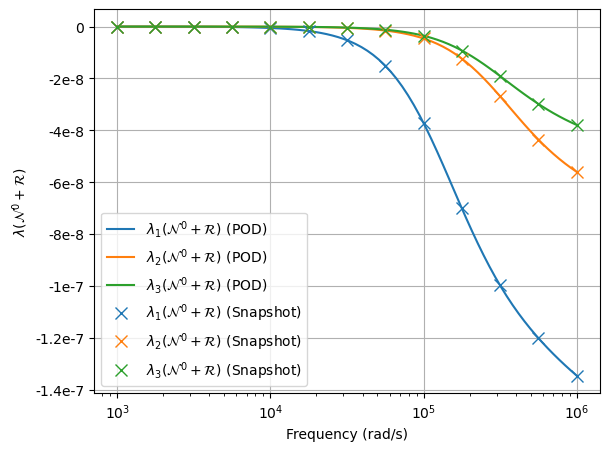

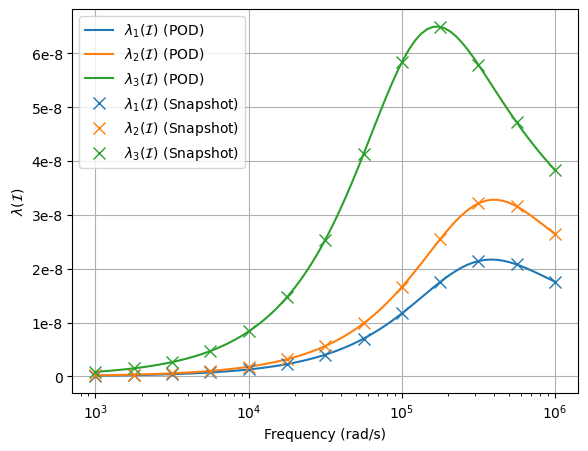

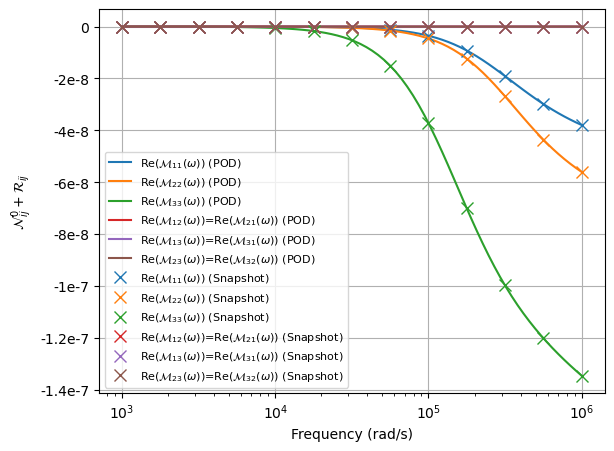

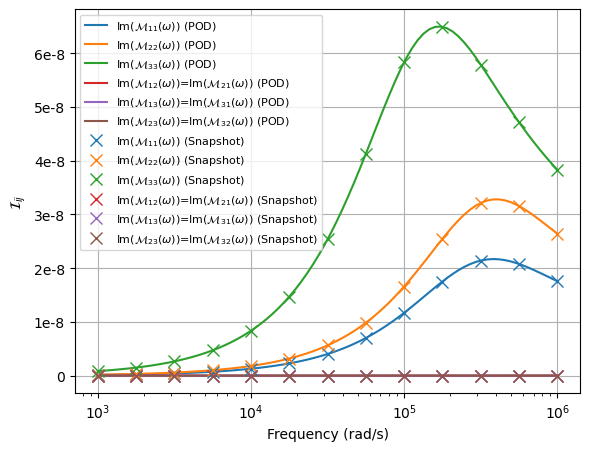

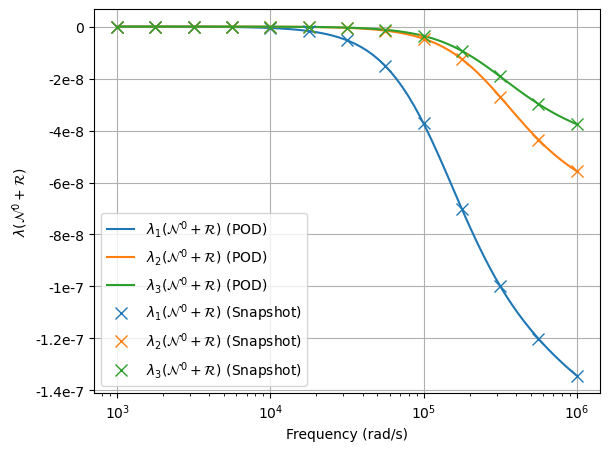

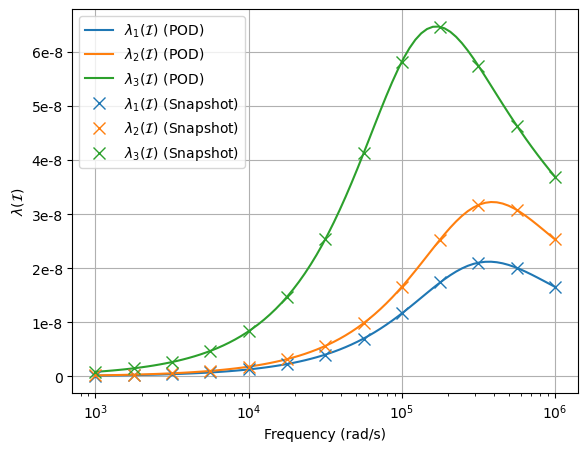

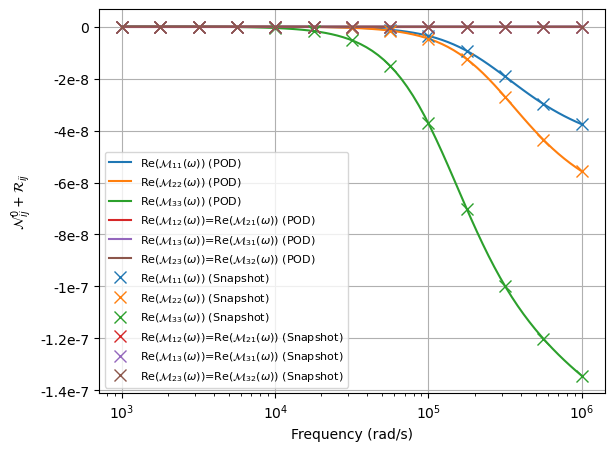

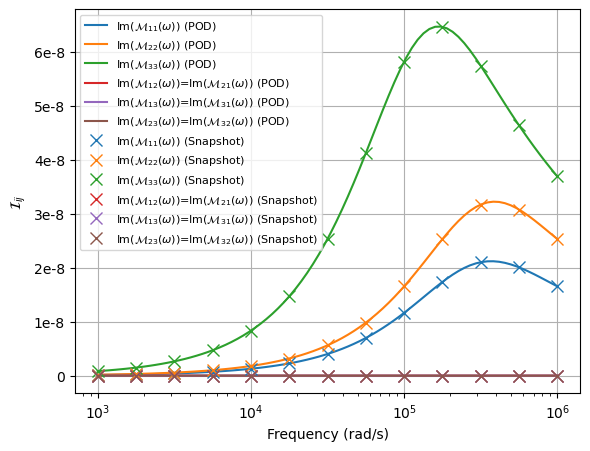

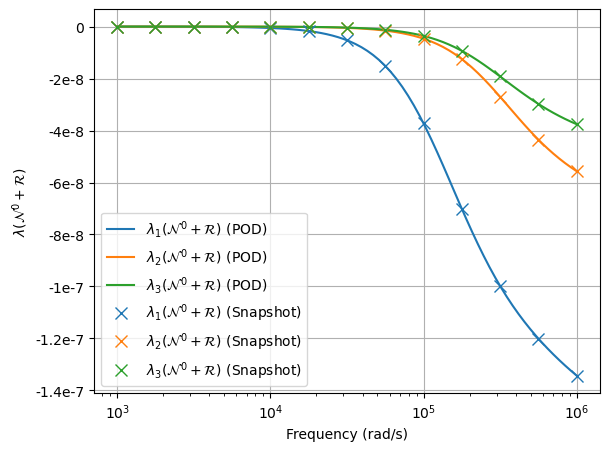

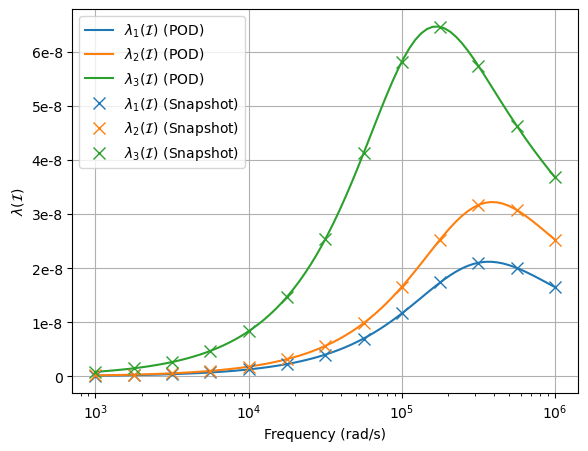

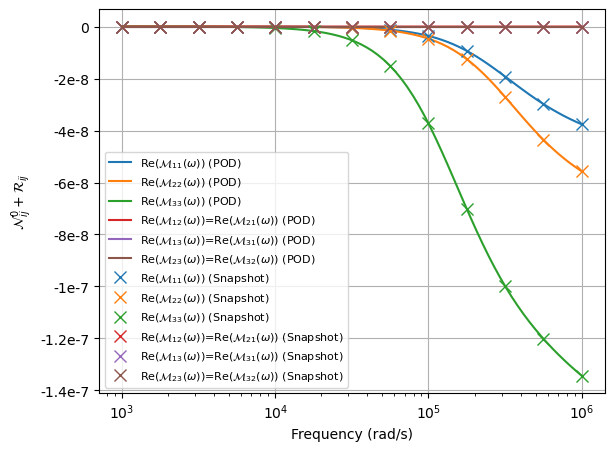

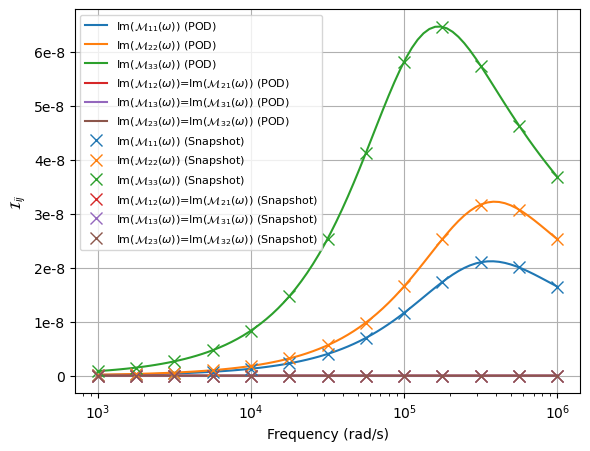

In [4]:
comparison_eigs = np.zeros((80,3,3), dtype=complex)
for p in [2,3,4]:
    TensorArray, EigenValues, N0, Elements, Array, Ndofs, EddyCurrentTest = main(start_stop=(start, stop, points), geometry=geometry, order=p, use_POD=True)
    comparison_eigs[:,:,p-2] = EigenValues

In [5]:
for eignum in [0,1,2]:
    plt.figure()
    for order in [0,1,2]:
        plt.semilogx(Array, comparison_eigs[:,eignum, order].real, label=f'p={order + 2}')
    plt.legend();
    plt.xlabel('$\omega$, [rad/s]');
    plt.ylabel(f'$\lambda_{eignum+1}(\mathcal{I})$');

    plt.figure()
    for order in [0,1,2:
        plt.semilogx(Array, comparison_eigs[:,eignum, order].imag, label=f'p={order + 2}')
    plt.legend();
    plt.xlabel('$\omega$, [rad/s]');
    plt.ylabel(f'$\lambda_{eignum+1}(\mathcal{I})$');


SyntaxError: invalid syntax (3078809819.py, line 10)